In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt



In [123]:
df = pd.read_excel('ENB2012_data.xlsx')


In [124]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [125]:
X = df.iloc[ : , : -2]
y_heat = df.iloc[ : , -2]
y_cool = df.iloc[ : , -1]
X_train, X_test, y_heat_train, y_heat_test = train_test_split(X, y_heat, test_size=0.2, random_state=42)
_, _, y_cool_train,y_cool_test = train_test_split(X, y_cool, test_size=0.2, random_state=42)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [126]:
performance_list = {}

In [127]:
def evaluate(y_h_pred,y_c_pred,NameModel):
    r2_heat = r2_score(y_heat_test,y_h_pred)
    mae_heat = mean_absolute_error(y_heat_test,y_h_pred)
    rmse_heat = np.sqrt(mean_squared_error(y_heat_test,y_h_pred))

    r2_coolt = r2_score(y_cool_test,y_c_pred)
    mae_cool = mean_absolute_error(y_cool_test,y_c_pred)
    rmse_cool = np.sqrt(mean_squared_error(y_cool_test,y_c_pred))

    metrics = [r2_heat,mae_heat,rmse_heat,r2_coolt,mae_cool,rmse_cool]
    performance_list[NameModel]=metrics


In [128]:

svr_heat = SVR(kernel='rbf', C=1000, gamma=0.1)
svr_heat.fit(X_train_scaled,y_heat_train)

svr_cool = SVR(kernel='rbf', C=1000, gamma=0.1)
svr_cool.fit(X_train_scaled,y_cool_train)


,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,tol,0.001
,C,1000
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [129]:
y_heat_pred = svr_heat.predict(X_test_scaled)
y_cool_pred = svr_cool.predict(X_test_scaled)
evaluate(y_heat_pred, y_cool_pred, "SVR")

In [144]:
performance_list

{'SVR': [0.9979137283523347,
  0.34156074751278537,
  0.46632297847364396,
  0.9740705745417477,
  0.9127526041382693,
  1.5500157793553382],
 'DecisionTreeRegressor': [0.9882672392081971,
  0.7561072587232819,
  1.105863429568528,
  0.9606801487989102,
  1.1930869328383618,
  1.9087348600369722],
 'RandomForestRegressor': [0.997627198551848,
  0.35824155844155764,
  0.4973156057156355,
  0.9677518270655477,
  1.0696350649350652,
  1.7285909284131407],
 'Xgboost': [0.9982239854941896,
  0.31225886515827916,
  0.43025372846741,
  0.17311923344565505,
  7.889277001418075,
  8.7530844300225],
 'lightgbm': [0.9975881248575315,
  0.3793608982097985,
  0.5013936148241918,
  0.9846165052008797,
  0.7853855603758327,
  1.1938978688690747],
 'catboost': [0.9989578253755246,
  0.23727839960130107,
  0.32958818547008,
  0.9945833272705358,
  0.4671661928816312,
  0.7084447247814603],
 'adaboost': [0.9819340336567131,
  1.0936868482828808,
  1.372246041337102,
  0.9616896303645307,
  1.26223579832

In [131]:
dt_heat = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_heat.fit(X_train_scaled, y_heat_train)

dt_cool = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_cool.fit(X_train_scaled, y_cool_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [132]:
y_heat_pred = dt_heat.predict(X_test_scaled)
y_cool_pred = dt_cool.predict(X_test_scaled)
evaluate(y_heat_pred, y_cool_pred, "DecisionTreeRegressor")

In [133]:
rf_heat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_heat.fit(X_train_scaled,y_heat_train)

rf_cool = RandomForestRegressor(n_estimators=100, random_state=43)
rf_cool.fit(X_train_scaled,y_cool_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [134]:
y_heat_pred = rf_heat.predict(X_test_scaled)
y_cool_pred = rf_cool.predict(X_test_scaled)
evaluate(y_heat_pred, y_cool_pred, "RandomForestRegressor")

In [135]:
xgb_heat = xgb.XGBRegressor(objective='reg:squarederror', 
                          n_estimators=100, 
                          learning_rate=0.1, 
                          max_depth=5,
                          random_state=42)
xgb_heat.fit(X_train_scaled, y_heat_train)

xgb_cool = xgb.XGBRFRegressor(objective='reg:squarederror',
                              n_estimators=100,
                              learning_rate=0.1,
                              max_depth=5,
                              random_state=42)
xgb_cool.fit(X_train_scaled, y_cool_train)

,learning_rate,0.1
,subsample,0.8
,colsample_bynode,0.8
,reg_lambda,1e-05
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bytree,None
,device,None


In [136]:
y_heat_pred = xgb_heat.predict(X_test_scaled)
y_cool_pred = xgb_cool.predict(X_test_scaled)
evaluate(y_heat_pred, y_cool_pred, "Xgboost")

In [137]:
lgbm_heat = lgb.LGBMRegressor(objective="regression",
                              n_estimators=100,
                              learning_rate=0.1,
                              max_depth=5,
                              random_state=42)
                              
lgbm_heat.fit(X_train_scaled,y_heat_train)

lgbm_cool = lgb.LGBMRegressor(objective='regression',
                              n_estimators=100,
                              learning_rate=0.1,
                              max_depth=5,
                              random_state=42)
lgbm_cool.fit(X_train_scaled,y_cool_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] Start training from score 22.155033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,5
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [138]:
y_heat_pred = lgbm_heat.predict(X_test_scaled)
y_cool_pred = lgbm_cool.predict(X_test_scaled)
evaluate(y_heat_pred, y_cool_pred, "lightgbm")

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [139]:
cat_heat = CatBoostRegressor(iterations=500,
                             learning_rate=0.1,
                             depth=5,
                             random_state=42,
                             verbose=0)
cat_heat.fit(X_train_scaled,y_heat_train)

cat_cool = CatBoostRegressor(iterations=500,
                             learning_rate=0.1,
                             depth=5,
                             random_state=42,
                             verbose=0)
cat_cool.fit(X_train_scaled,y_cool_train)

In [140]:
y_heat_pred = cat_heat.predict(X_test_scaled)
y_cool_pred = cat_cool.predict(X_test_scaled)
evaluate(y_heat_pred, y_cool_pred, "catboost")

In [141]:
ada_heat = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                             n_estimators=100,
                             random_state=42)
ada_heat.fit(X_train_scaled,y_heat_train)

ada_cool = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5),
                             n_estimators=100,
                             random_state=42)
ada_cool.fit(X_train_scaled,y_cool_train)

,estimator,DecisionTreeR...r(max_depth=5)
,n_estimators,100
,learning_rate,1.0
,loss,'linear'
,random_state,42
,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [142]:
y_heat_pred = ada_heat.predict(X_test_scaled)
y_cool_pred = ada_cool.predict(X_test_scaled)
evaluate(y_heat_pred, y_cool_pred, "adaboost")

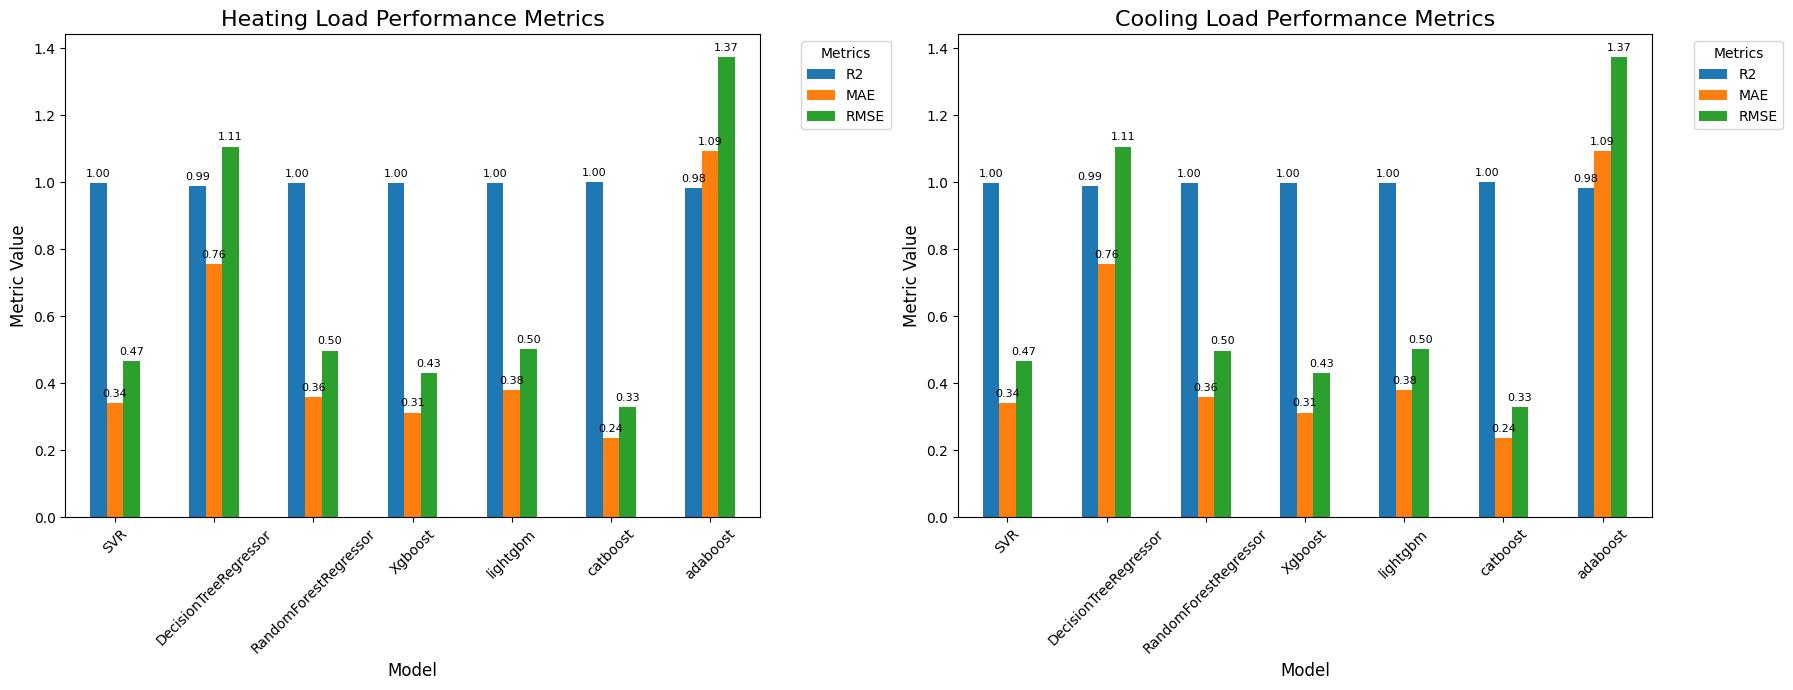

In [143]:
data = performance_list
df = pd.DataFrame(data).T
df.columns = ['R2', 'MAE', 'RMSE', 'CL_R2', 'CL_MAE', 'CL_RMSE']
df = df.round(4)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

df[['R2', 'MAE', 'RMSE']].plot(kind='bar', ax=axes[0], rot=45)
axes[0].set_title('Heating Load Performance Metrics', fontsize=16)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('Metric Value', fontsize=12)
axes[0].legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f', fontsize=8, padding=3)

df[['R2', 'MAE', 'RMSE']].plot(kind='bar', ax=axes[1], rot=45)
axes[1].set_title('Cooling Load Performance Metrics', fontsize=16)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('Metric Value', fontsize=12)
axes[1].legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', fontsize=8, padding=3)

plt.tight_layout()
plt.show()